<a href="https://colab.research.google.com/github/ku1esh00v/AI_Machine_Learning_2/blob/main/AI_%26_ML_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №2

**Визуальный анализ данных**




*Подключение библиотек*


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

*Загрузка данных*

In [ ]:
data_path = "/content/drive/MyDrive/Pokemon.csv"
data = pd.read_csv(data_path)
data.head(10)
# data.columns

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


**Одиночные признаки**


*Количественные признаки*

In [ ]:
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

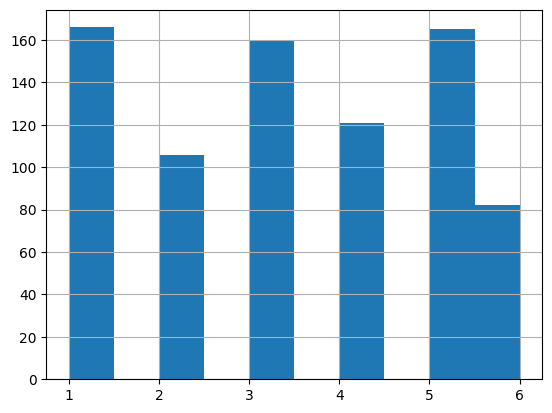

In [ ]:
# Применение pandas для визуализации данных
# Pandas работает как настройка над matplotlib
data['Generation'].hist();

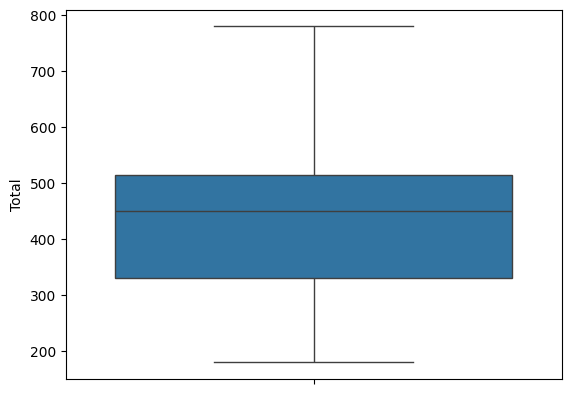

In [ ]:
# использование Seaborn
# Построение диаграммы типа "ящик с усами"
# по диаграмме можно определить медиану, квартили,
# интерквартильный размах, выбросы
sns.boxplot(data['Total']);

<ipython-input-35-18d0d3c25c41>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Total',


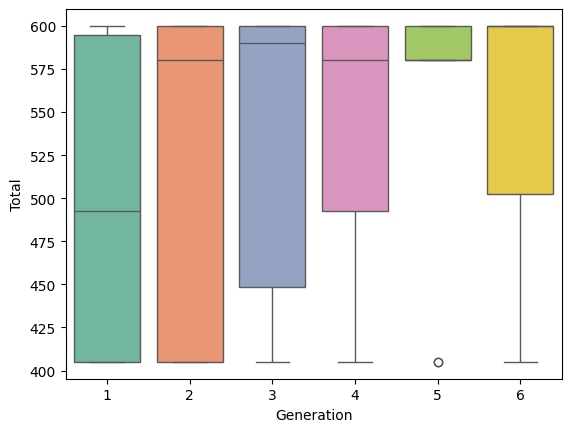

In [ ]:
top_data = data[['Total','Generation']]
top_data = top_data.groupby('Total').sum()
top_data = top_data.sort_values('Generation',ascending=False)
top_data = top_data[:3].index.values
sns.boxplot(y='Total',
            x='Generation',
            data=data[data.Total.isin(top_data)], palette='Set2');

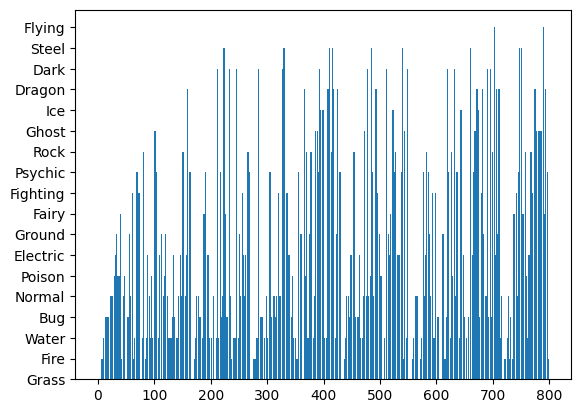

In [ ]:
plt.bar(data.index, data['Type 1'])
plt.show()

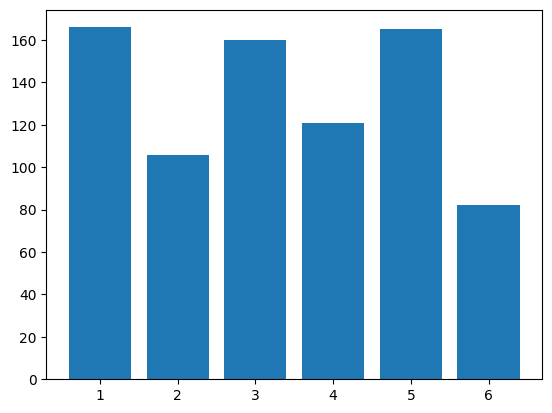

In [ ]:
hist = data['Generation'].value_counts()
plt.bar(hist.index, hist);

In [ ]:
# jn,jh ghbpyfrjd
feats=[f for f in data.columns if 'Sp' in f]
feats

['Sp. Atk', 'Sp. Def', 'Speed']

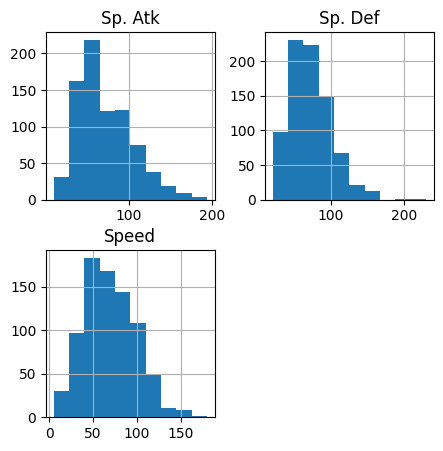

In [ ]:
# построение гистограммы для нескольких признаков
data[feats].hist(figsize=(5,5));

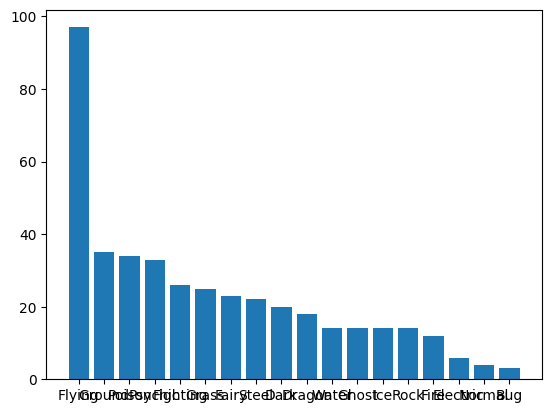

In [ ]:
# определение первых n "популярных" типов покемонов из Type 2
# data['Type 2'].value_counts().head(10)
hist = data['Type 2'].value_counts()
plt.bar(hist.index, hist);

In [ ]:
# фактически бинарный признак
data['Legendary'].value_counts()

Legendary
False    735
True      65
Name: count, dtype: int64

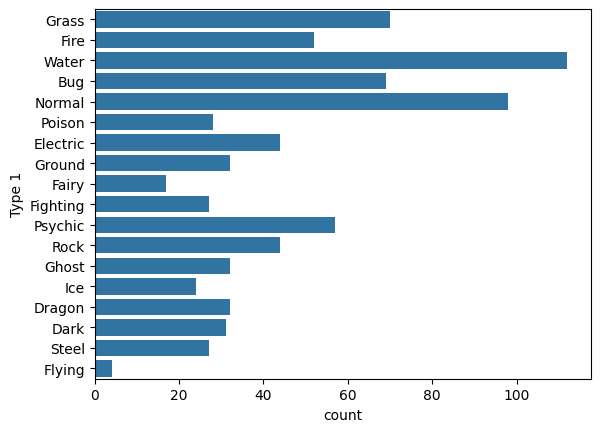

In [ ]:
sns.countplot(data['Type 1']);

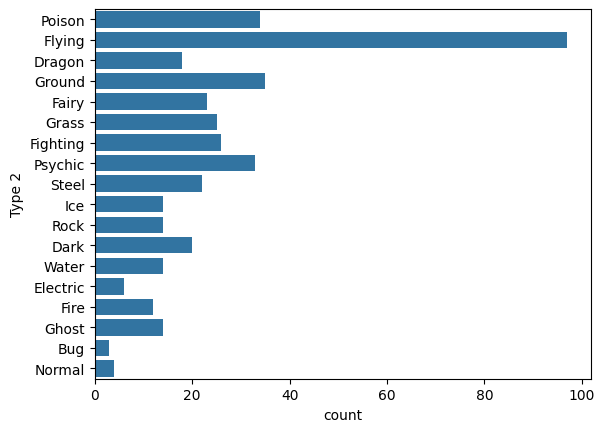

In [ ]:
# гистограмма для всех покемонов Type 2
sns.countplot(data['Type 2']);

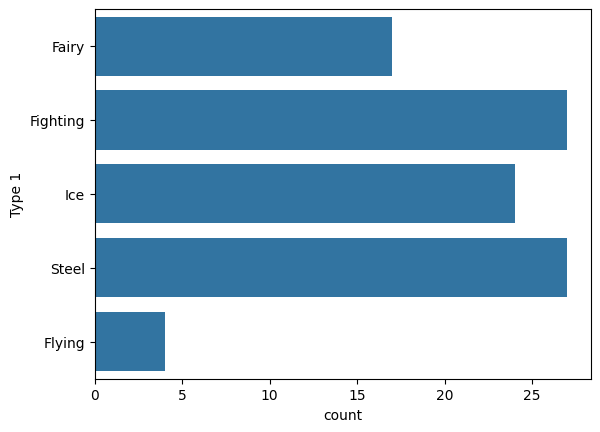

In [ ]:
# гистограмма "популярных" покемонов из Type 1
sns.countplot(data[data['Type 1'].isin(data['Type 1'].value_counts().tail(5).index)]['Type 1']);

**Взаимосвязанные признаки**

*Количественный - количественный*


In [ ]:
# список колонок
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [ ]:
# Отбор числовых признаков, содержащих слово 'Sp.'
feats = [f for f in data.columns if 'Sp.' in f]
len(feats)
# feats=['Total day calls', 'Total day Sp.']

2

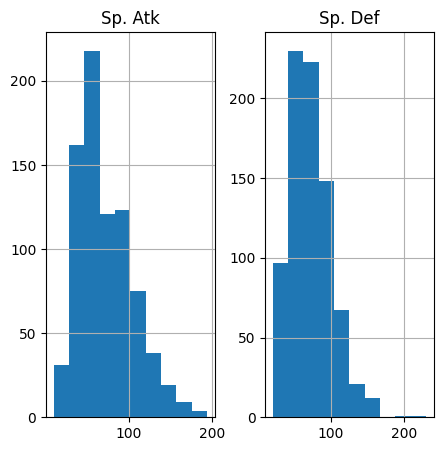

In [ ]:
# строим отдельные гистограммы
# для нескольких признаков
data[feats].hist(figsize=(5,5));

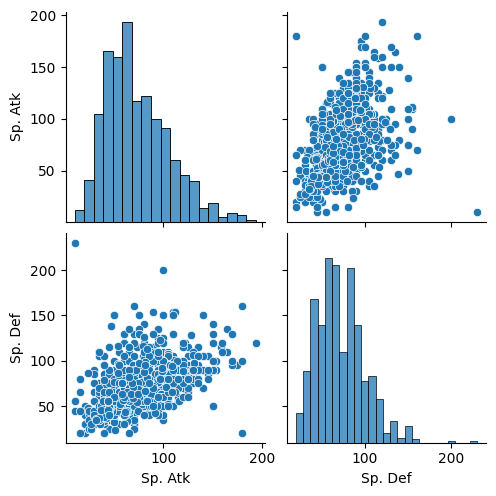

In [ ]:
# Попарное распределение признаков
# Применение Seaborn
sns.pairplot(data[feats]);

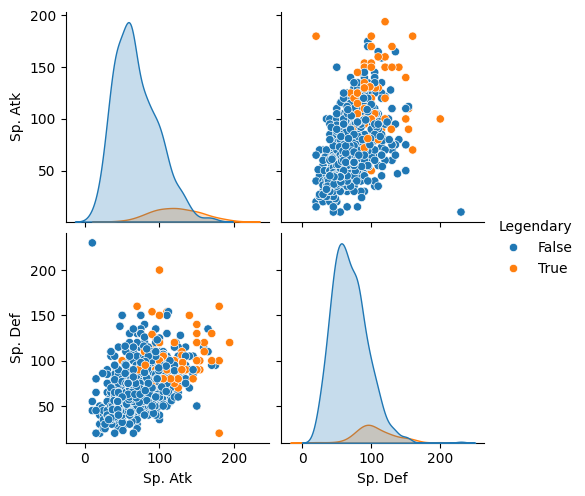

In [ ]:
# Можно строить более сложные попарные распределения признаков (добавил колонку "Legendary")
sns.pairplot(data[feats + ['Legendary']], hue='Legendary');

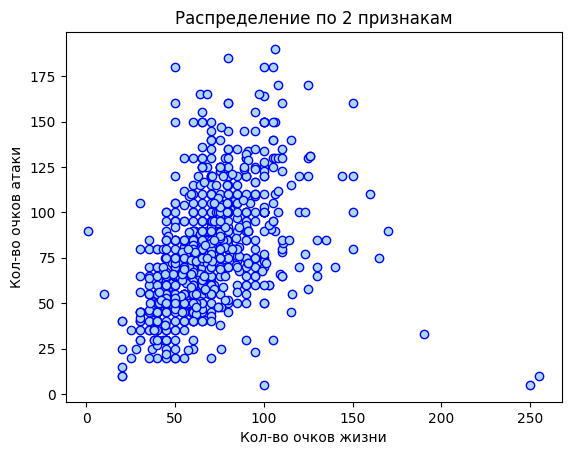

In [ ]:
# Использование matplotlib, подписей данных, заголовков Использование простейших пользовательских цветов
plt.scatter(data['HP'],
            data['Attack'],
            color='lightblue', edgecolors='blue')
plt.xlabel('Кол-во очков жизни')
plt.ylabel('Кол-во очков атаки')
plt.title('Распределение по 2 признакам');

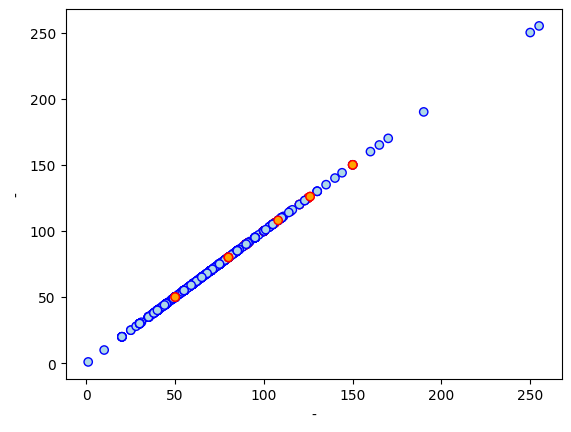

In [ ]:
# Раскрашивание данных
# Цвет в зависимости от типа кол-ва очков жизни
c = data['Legendary'].map({False: 'lightblue', True: 'orange'})
edge_c = data['Legendary'].map({False: 'blue', True: 'red'})
# Настройка графика
plt.scatter(data['HP'], data['HP'],
            color=c, edgecolors=edge_c
           )
plt.xlabel('-')
plt.ylabel('-');

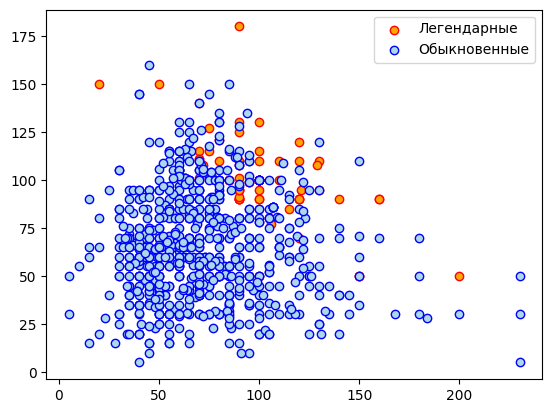

In [ ]:
# Раскраска легендарных и обыкновенных покемонов,

# Легендарные покемоны
data_churn = data[data['Legendary']]
# Обыкновенные покемоны
data_loyal = data[~data['Legendary']]

plt.scatter(data_churn['Defense'],
            data_churn['Speed'],
            color='orange',
            edgecolors='red',
            label='Легендарные'
           )
plt.scatter(data_loyal['Defense'],
            data_loyal['Speed'],
            color='lightblue',
            edgecolors='blue',
            label='Обыкновенные'
           )

plt.legend();

**Корреляция признаков**

<Axes: >

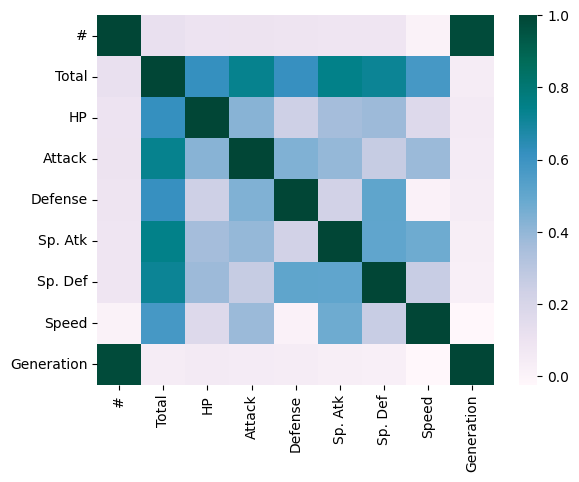

In [ ]:
# Выберим только числовые столбцы
numeric_data = data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), cmap=plt.cm.PuBuGn)


In [ ]:
# Удаление коррелирующих признаков
data_uncorr = data.drop(feats, axis=1)
data_uncorr.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('AI_&_ML_2')

File ‘colab_pdf.py’ already there; not retrieving.





E: Unable to locate package texlive-generic-recommended
[NbConvertApp] WARNING | pattern '$notebookpath$file_name' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y

'File Download Unsuccessful. Saved in Google Drive'